In [2]:
import pandas as pd
dataset = pd.read_csv("titanic_train.csv")

In [3]:
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.drop("PassengerId", axis=1, inplace=True)
dataset.drop("Name", axis=1, inplace=True)
dataset.drop("Ticket", axis=1, inplace=True)
dataset.drop("Fare", axis=1, inplace=True)
dataset.drop("Cabin", axis=1, inplace=True)

In [5]:
dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [6]:
Sex = pd.get_dummies(dataset["Sex"], drop_first=True)

In [7]:
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [18]:
Pclass = pd.get_dummies(dataset["Pclass"], drop_first=True)
SibSp = pd.get_dummies(dataset["SibSp"], drop_first=True)
Parch = pd.get_dummies(dataset["Parch"])
Embarked = pd.get_dummies(dataset["Embarked"], drop_first=True)

In [19]:
Parch

,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
886,1,0,0,0,0,0,0
887,1,0,0,0,0,0,0
888,0,0,1,0,0,0,0
889,1,0,0,0,0,0,0


In [8]:
X = pd.concat([Sex,Pclass,SibSp,Parch,Embarked],axis=1)

In [9]:
def fill(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [10]:
dataset["Age"] = dataset[["Age","Pclass"]].apply(fill, axis=1)

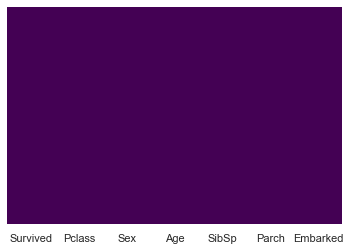

In [11]:
import seaborn as sns
sns.set()

sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [12]:
Age = dataset["Age"]

In [13]:
Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [14]:
X = pd.concat([Age,Sex,SibSp,Parch,Embarked,Pclass],axis=1)

In [12]:
Parch

,1,2,3,4,5,6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
886,0,0,0,0,0,0
887,0,0,0,0,0,0
888,0,1,0,0,0,0
889,0,0,0,0,0,0


In [15]:
X

,Age,male,1,2,3,4,5,8,1,2,3,4,5,6,Q,S,2,3
0,22.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,38.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,35.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,35.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
887,19.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
888,25.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
889,26.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
y = dataset["Survived"]

In [17]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [48]:
"""""""""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)
"""""""""

'\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)\nmodel.fit(X_train,y_train)\ny_predicted = model.predict(X_test)\nfrom sklearn.metrics import confusion_matrix\nconfusion_matrix(y_test, y_predicted)\n'

In [49]:
"""""""""
TotalRecord = 140+17+33+78
TrueRecord = 140+78
FalseRecord = 33+17
Accuracy = (TrueRecord/TotalRecord) * 100
print("Accuracy of your Model is :", Accuracy)
"""""""""

'\nTotalRecord = 140+17+33+78\nTrueRecord = 140+78\nFalseRecord = 33+17\nAccuracy = (TrueRecord/TotalRecord) * 100\nprint("Accuracy of your Model is :", Accuracy)\n'

In [51]:

from sklearn.externals import joblib
joblib.dump(model, "TitanicSurvivalPrediction.pk1")

# loadedmodel = joblib.load("TitanicSurvivalPrediction.pk1")
# loadedmodel.predict(X_test)

['TitanicSurvivalPrediction.pk1']